# import Modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
insurance = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=true')

In [7]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Checkin the information of the data and the number of missing values in our data**

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

**create a histogram plot of the Price column**

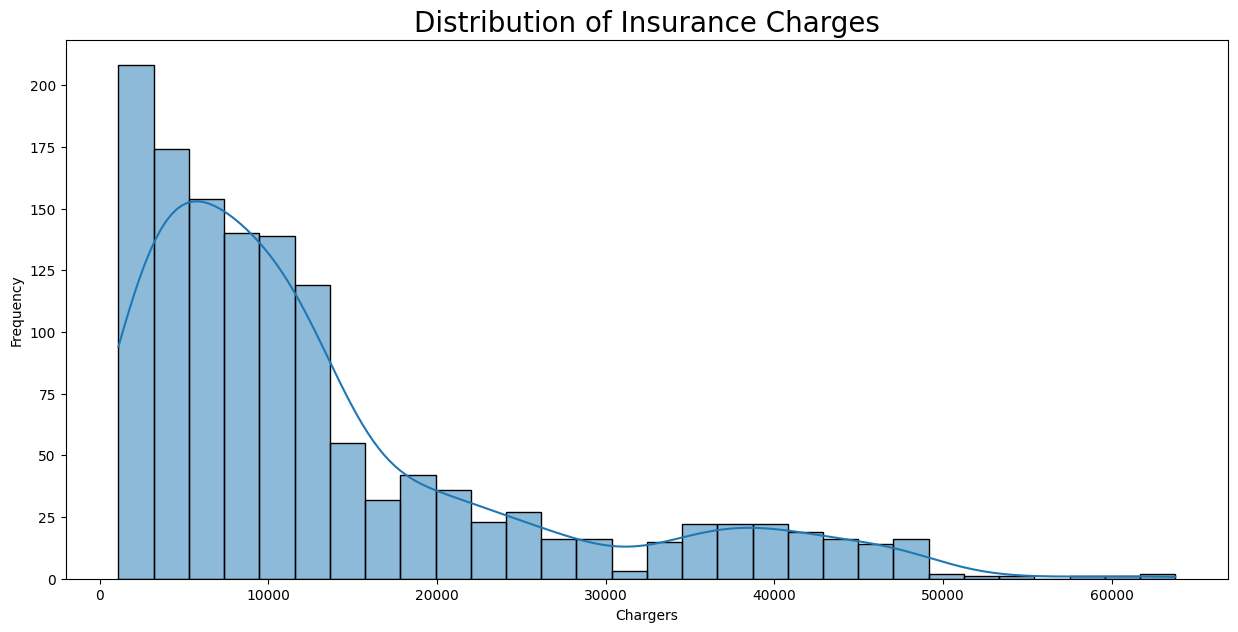

In [10]:
plt.figure(figsize=(15,7))
# create a histogram plot of the Price column
sns.histplot(data=insurance, x="charges", kde=True)

# set the title and labels
plt.title("Distribution of Insurance Charges",size=20)
plt.xlabel("Chargers")
plt.ylabel("Frequency")

# show the plot
plt.show()


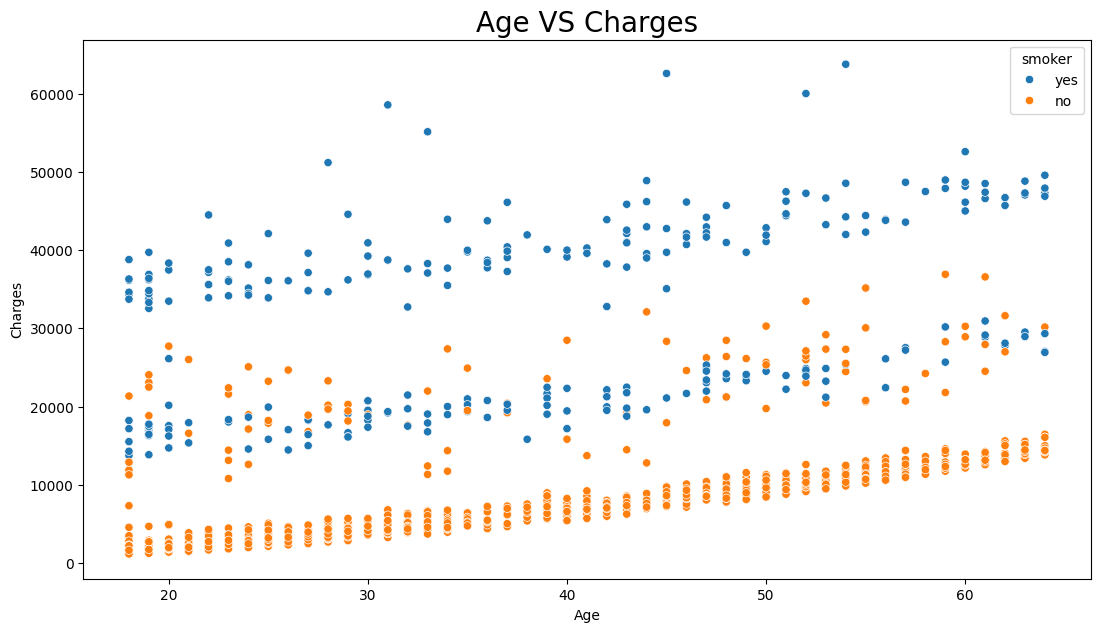

In [11]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=insurance,x='age',y='charges',hue='smoker')
plt.title('Age VS Charges',size=20)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

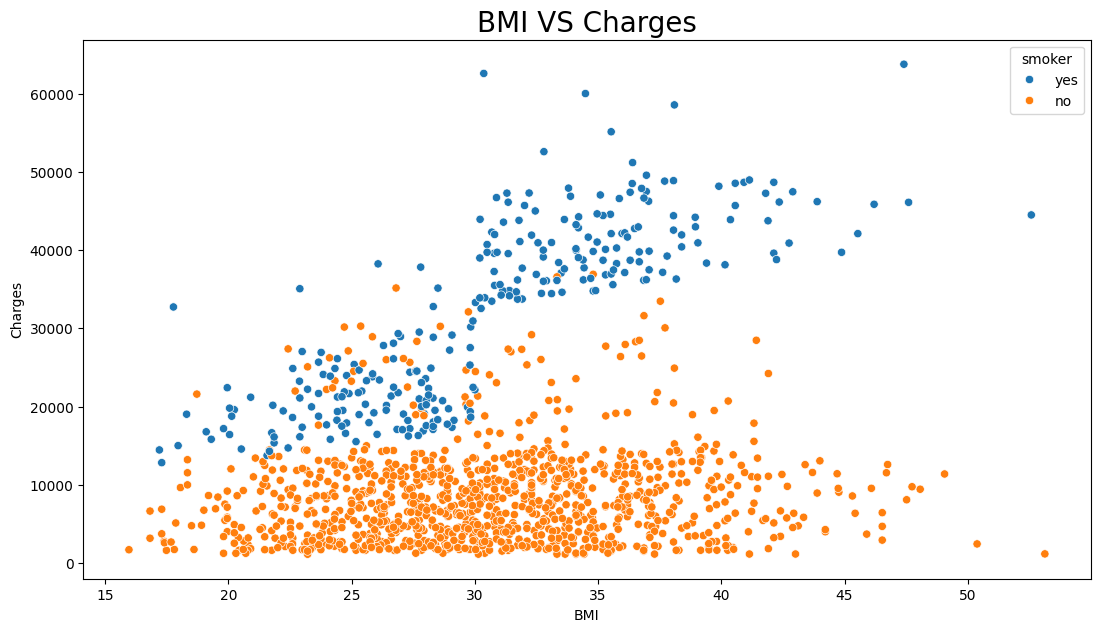

In [12]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=insurance,x='bmi',y='charges',hue='smoker')
plt.title('BMI VS Charges',size=20)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

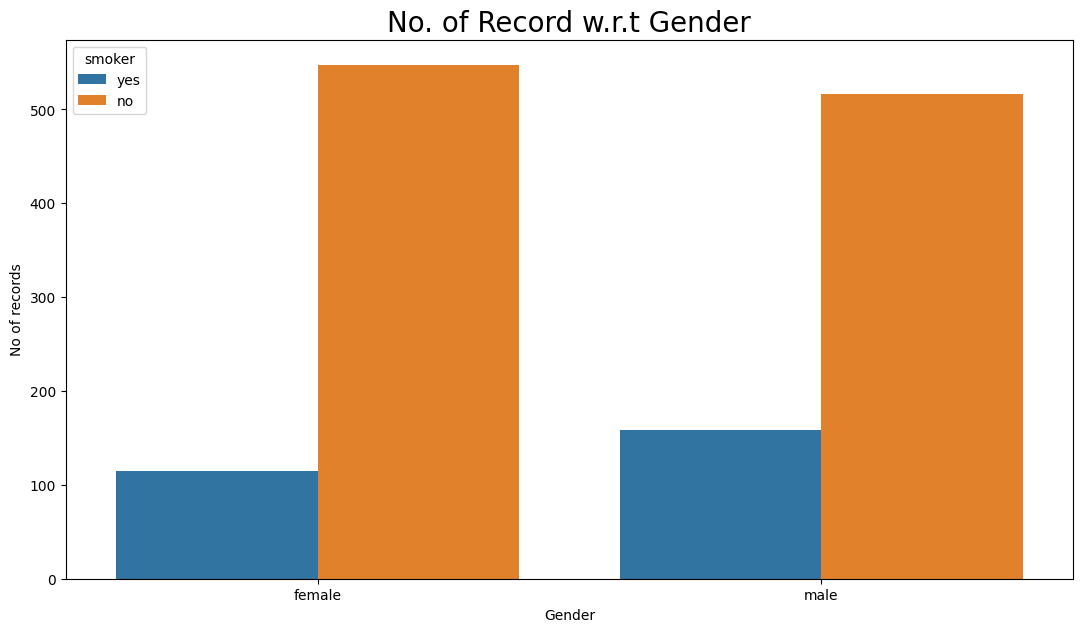

In [13]:
plt.figure(figsize=(13,7))
sns.countplot(data=insurance,x='gender',hue='smoker')
plt.title('No. of Record w.r.t Gender',size=20)
plt.xlabel('Gender')
plt.ylabel('No of records')
plt.show()

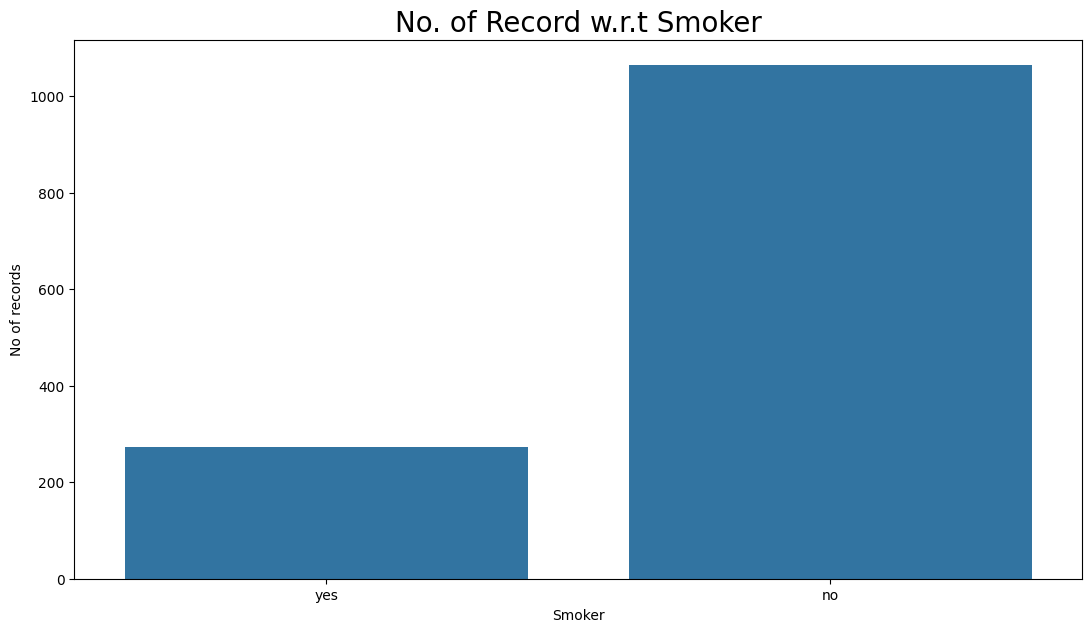

In [14]:
plt.figure(figsize=(13,7))
sns.countplot(data=insurance,x='smoker')
plt.title('No. of Record w.r.t Smoker',size=20)
plt.xlabel('Smoker')
plt.ylabel('No of records')
plt.show()

# Encoding Data

## Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [16]:
label_encoder.fit(insurance['gender'])

LabelEncoder()

In [17]:
insurance['gender'] = label_encoder.transform(insurance['gender'])

In [18]:
label_encoder.fit(insurance['smoker'])
insurance['smoker'] = label_encoder.transform(insurance['smoker'])

In [19]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## One Hot Encoder

In [20]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

In [21]:
onehot_encoder.fit(insurance[['region']])

OneHotEncoder()

In [22]:
temp = onehot_encoder.transform(insurance[['region']]).toarray()

In [23]:
onehot_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [24]:
temp_data = pd.DataFrame(temp,
                         columns=['northeast', 'northwest', 'southeast', 'southwest'],
                         dtype='int')

In [25]:
insurance = pd.concat([insurance,temp_data],axis=1)

In [26]:
insurance.drop('region',axis=1,inplace=True)

In [27]:
insurance.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


# Spliting our data into training and testing

In [28]:
X = insurance.drop('charges',axis=1)
Y = insurance['charges']

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Applying linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [33]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

# Making Predictions

**Making Prediction for just one record**

In [35]:
linear_regression.predict([[38,1,37.050,1,0,1,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10870.1944927])

In [34]:
X_test.head()

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
44,38,1,37.050,1,0,1,0,0,0
134,20,0,28.785,0,0,1,0,0,0
980,54,1,25.460,1,0,1,0,0,0
618,19,0,33.110,0,1,0,0,1,0
1238,37,1,22.705,3,0,1,0,0,0


In [36]:
Y_test[0]

16884.924

**Making Predictions for all records**

In [37]:
predictions = linear_regression.predict(X_test)

# Checking Performance of the Model

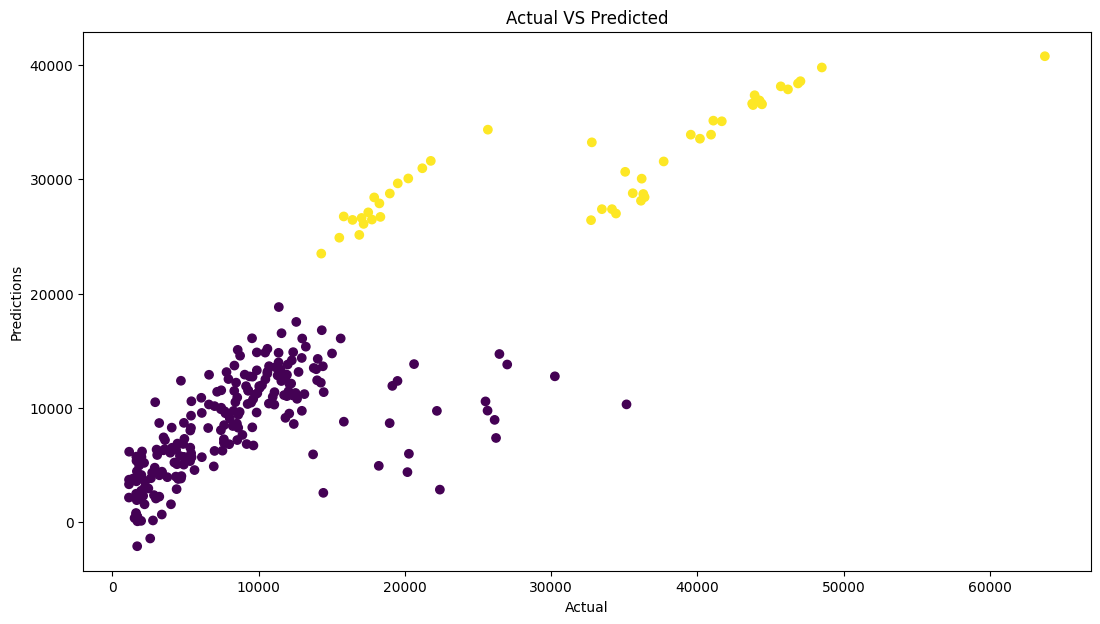

In [44]:
plt.figure(figsize=(13,7))
plt.scatter(Y_test,predictions,c=X_test['smoker'])
plt.title('Actual VS Predicted')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean squared error:", rmse)
print("R-squared score:", r2)


Mean absolute error: 4036.874028358429
Mean squared error: 33748393.370595865
Root Mean squared error: 5809.336741022667
R-squared score: 0.7608371101323962
